In [105]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

since we have both the datasets one is train data sets and other is test datasets

In [2]:
train=pd.read_csv('bank_train.csv')
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
test=pd.read_csv('bank_test.csv')
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

hence in the train datasets there is no null values 

now lets check for test datasets 

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [7]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

hence in the test dataset also there is no null values

In [8]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
for i in train.select_dtypes(include='object').columns:
    print(i)
    print(train[i].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']


Hence most of the columns are categorical values only

Lets start the EDA process

### Exploratory Data Analysis

for this datasets there are many unwanted columns like id  and all which are independent on the target value 

In [10]:
train=train.drop(columns='ID')

In [11]:
test=test.drop(columns='ID')

In [12]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [13]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


age            Axes(0.125,0.11;0.0945122x0.77)
balance     Axes(0.238415,0.11;0.0945122x0.77)
day         Axes(0.351829,0.11;0.0945122x0.77)
duration    Axes(0.465244,0.11;0.0945122x0.77)
campaign    Axes(0.578659,0.11;0.0945122x0.77)
pdays       Axes(0.692073,0.11;0.0945122x0.77)
previous    Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

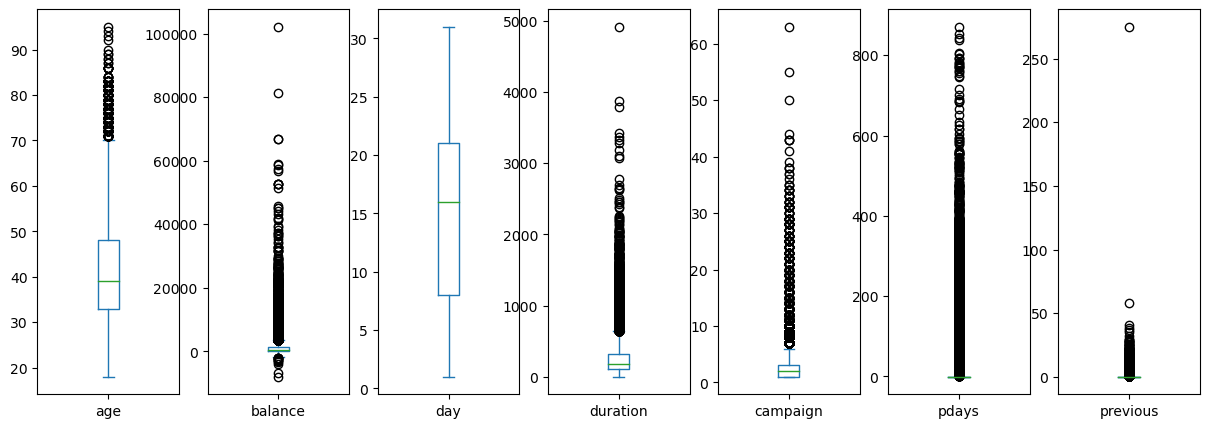

In [14]:
train.plot(kind='box',subplots=True,figsize=(15,5))

as we see the boxplots we can see that there are many outliers 

age            Axes(0.125,0.11;0.0945122x0.77)
balance     Axes(0.238415,0.11;0.0945122x0.77)
day         Axes(0.351829,0.11;0.0945122x0.77)
duration    Axes(0.465244,0.11;0.0945122x0.77)
campaign    Axes(0.578659,0.11;0.0945122x0.77)
pdays       Axes(0.692073,0.11;0.0945122x0.77)
previous    Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

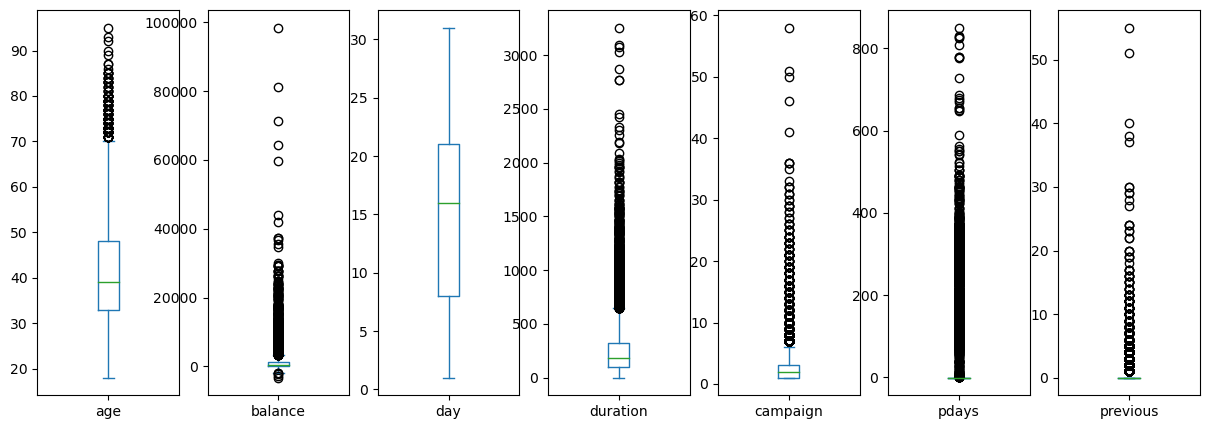

In [15]:
test.plot(kind='box',subplots=True,figsize=(15,5))

In [16]:
categorical_features=[feature for feature in train.columns if ((train[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

so these are the categorical features

In [17]:
for feature in categorical_features:
    print('For the {} column there are {} categories'.format(feature,len(train[feature].unique())))

For the job column there are 12 categories
For the marital column there are 3 categories
For the education column there are 4 categories
For the default column there are 2 categories
For the housing column there are 2 categories
For the loan column there are 2 categories
For the contact column there are 3 categories
For the month column there are 12 categories
For the poutcome column there are 4 categories
For the subscribed column there are 2 categories


hence from this we get the idea that how many number of categories do we have in categorical_columns

now we will see the counts of these categorical_columns by the categorical plot

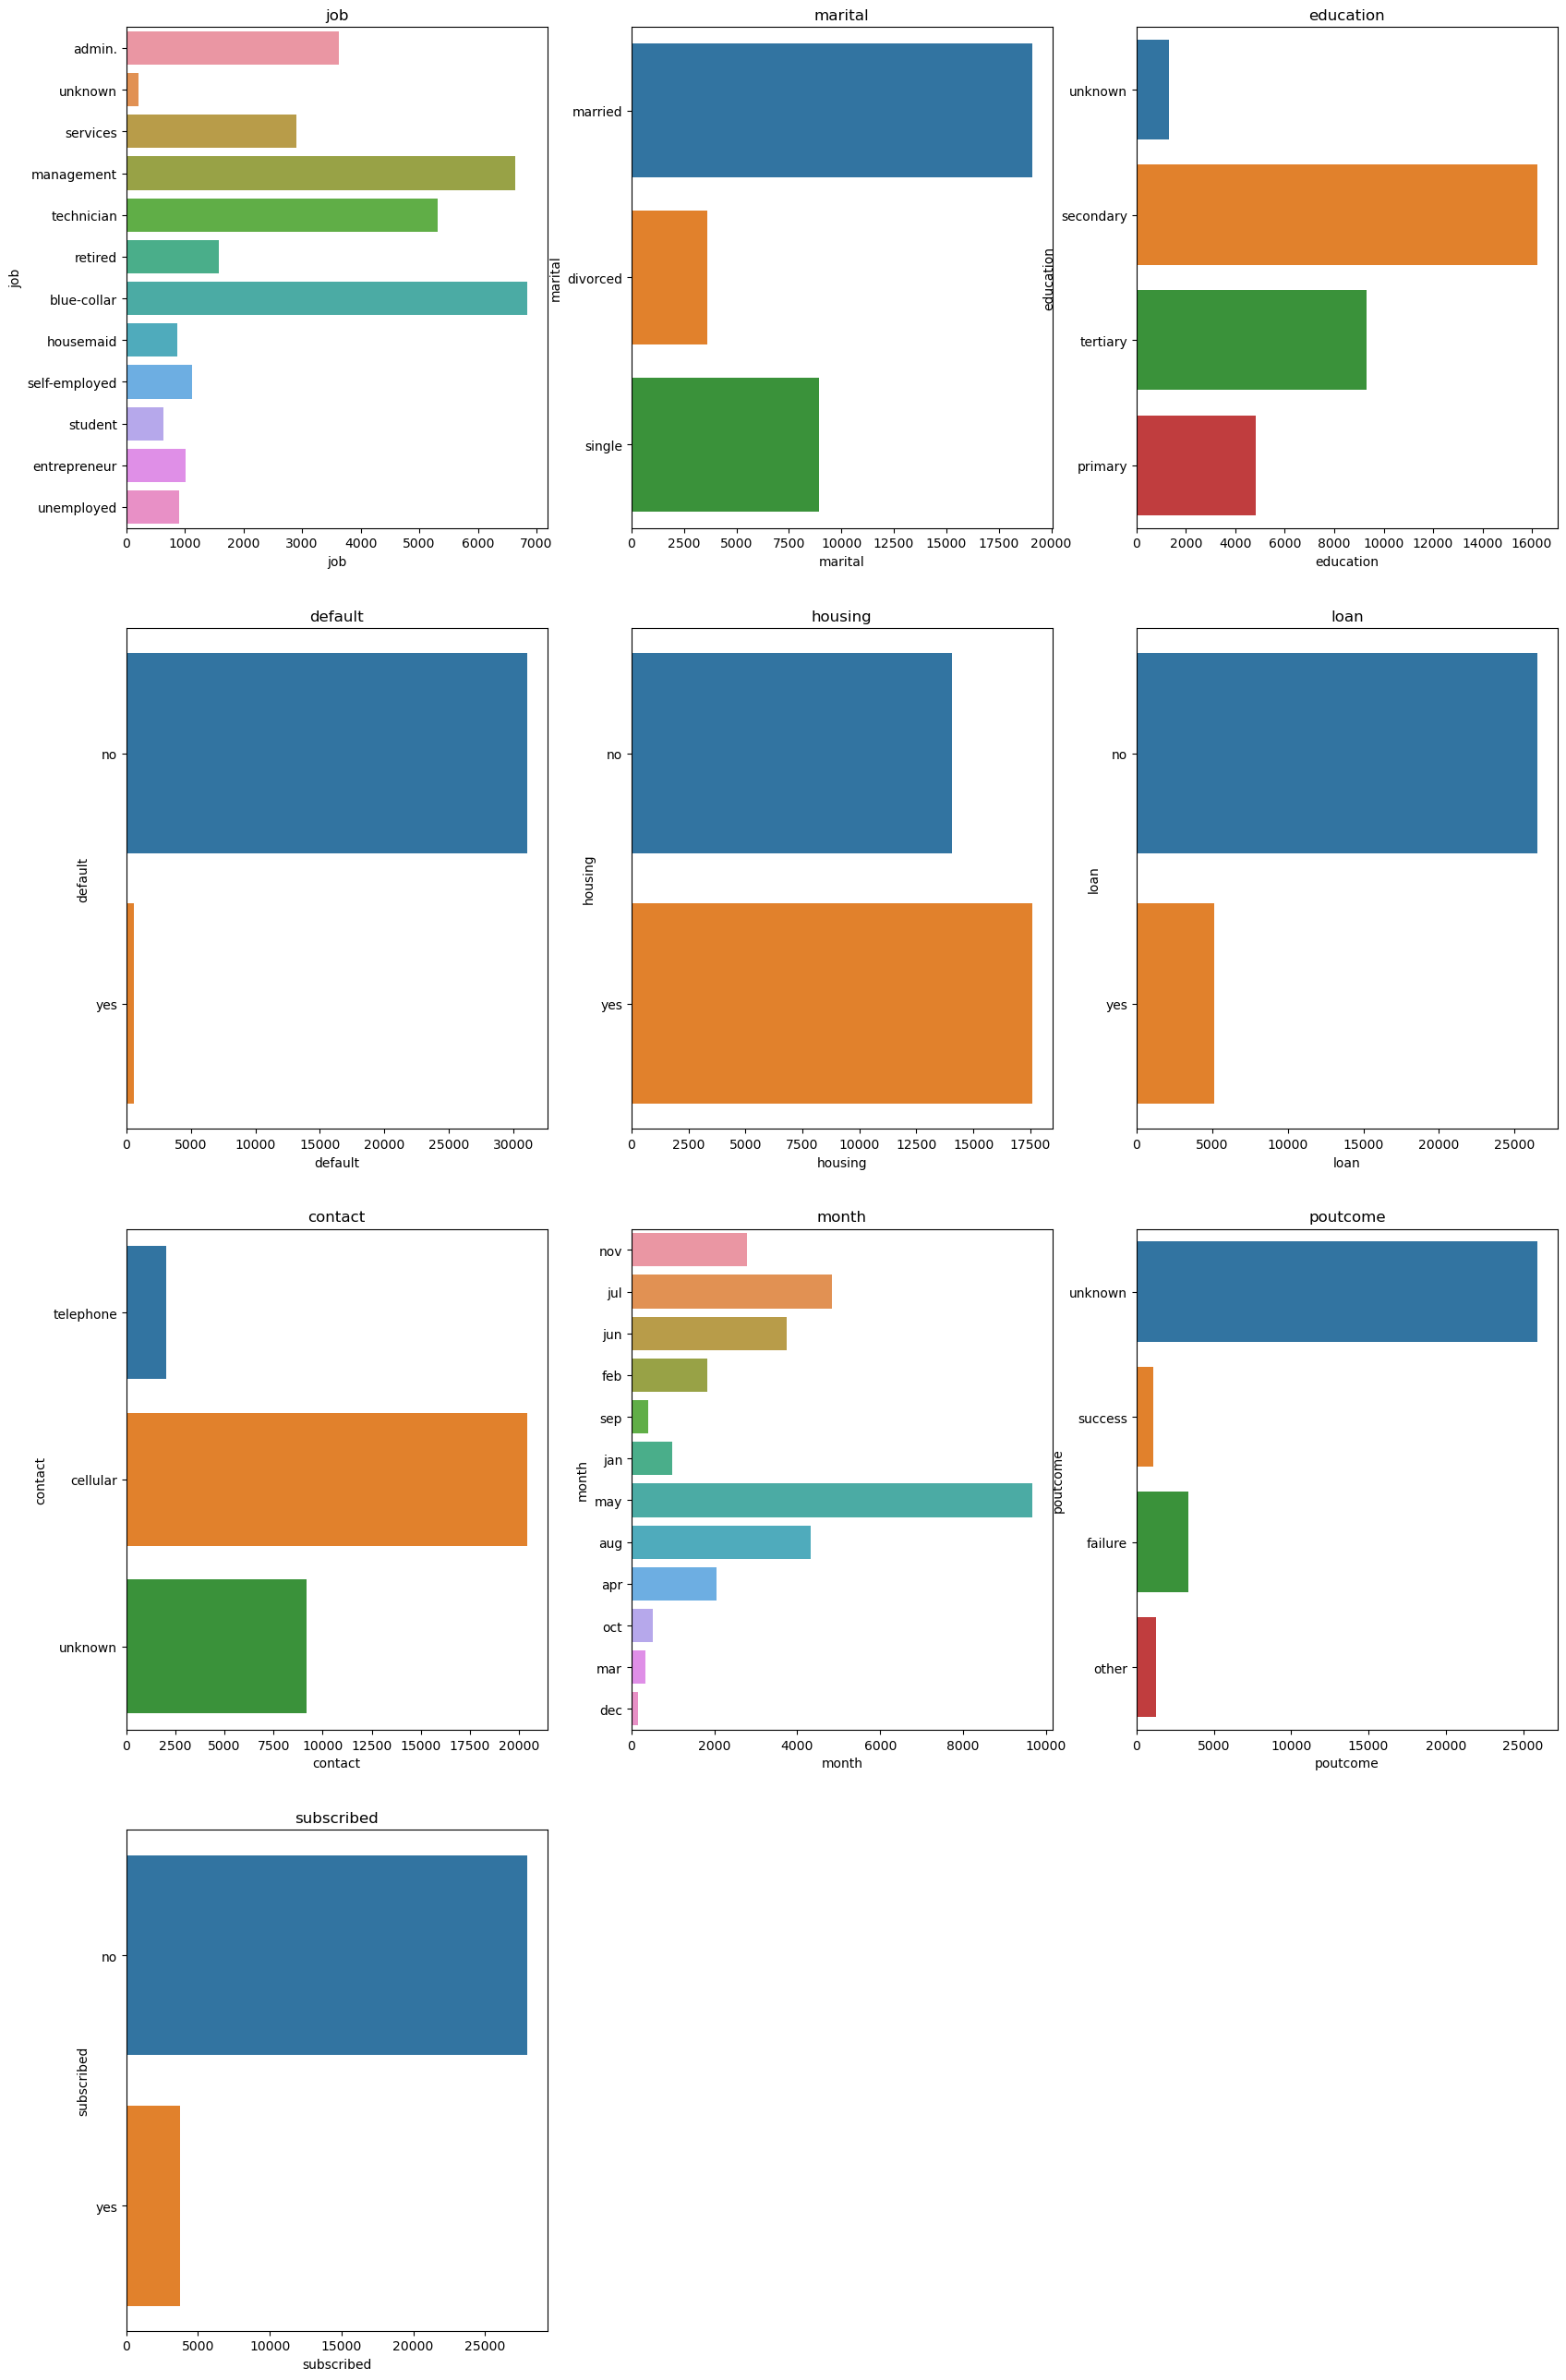

In [18]:
plt.figure(figsize=(20,100), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=train)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

as we see that management and blue-coloar have the highest count in the data sets 

now lets see how the categorical data contribute to the target value

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\si

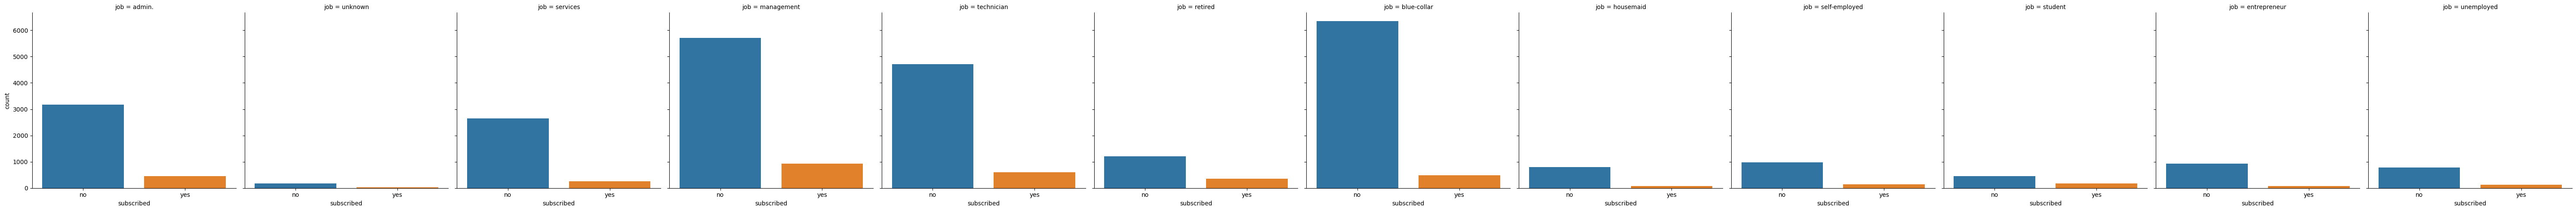

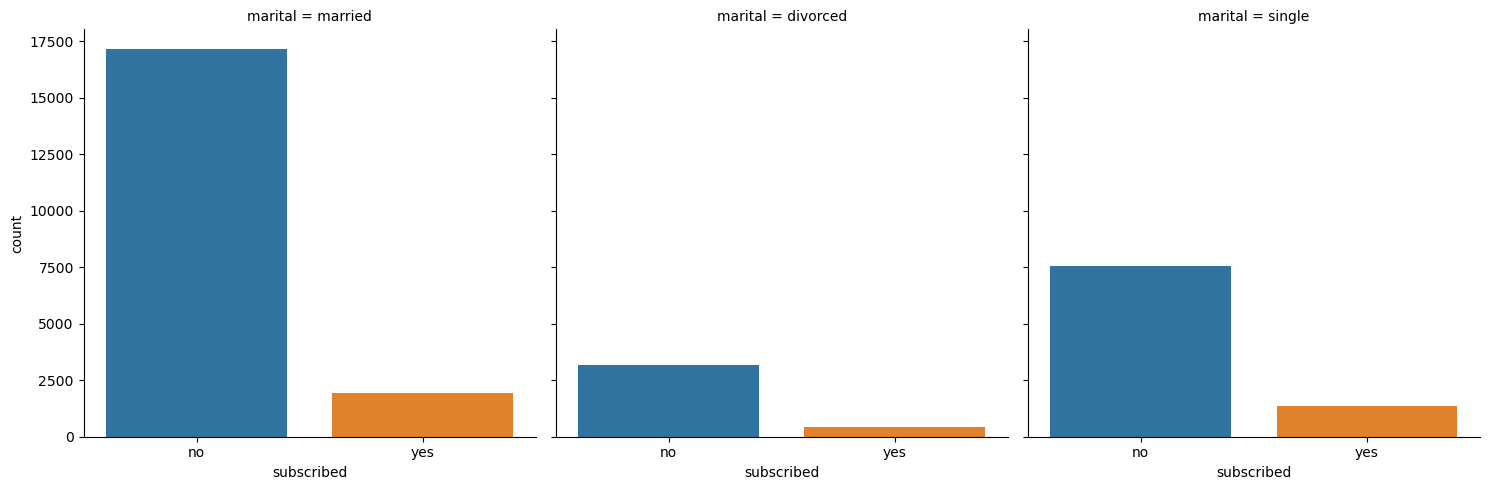

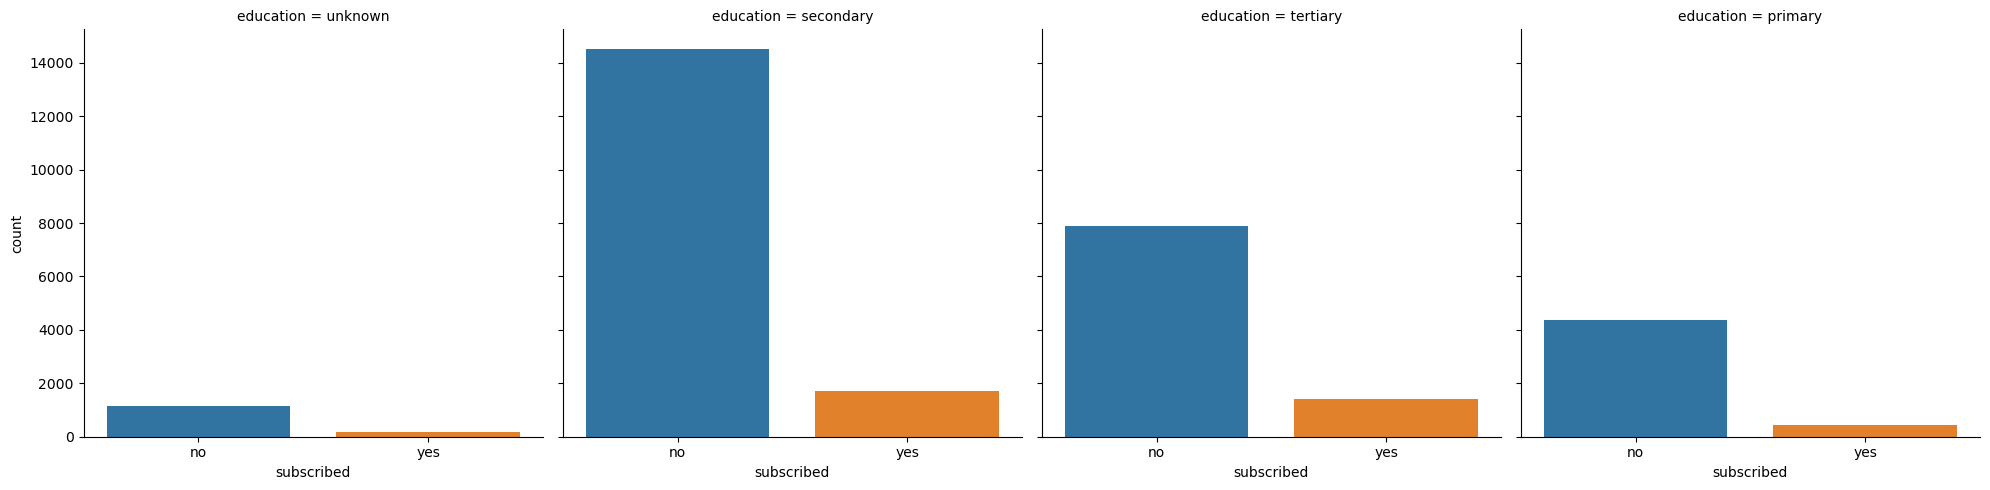

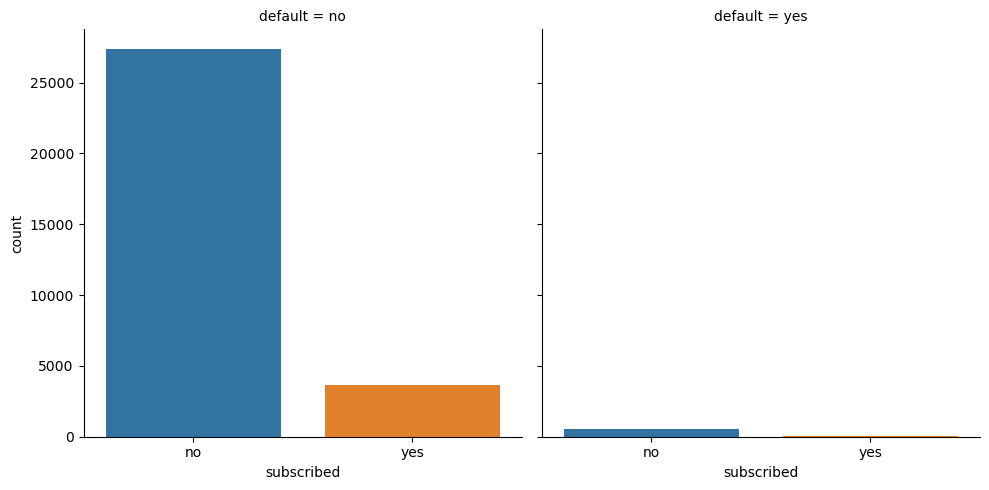

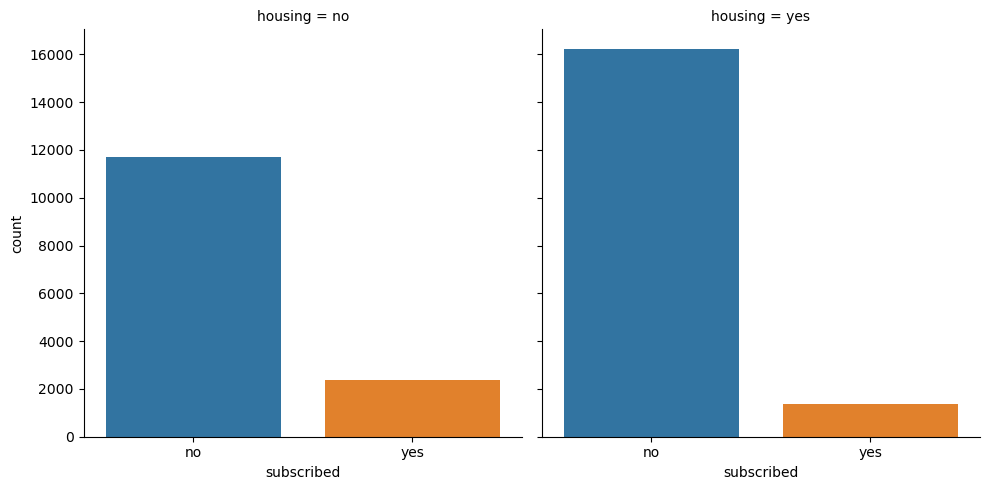

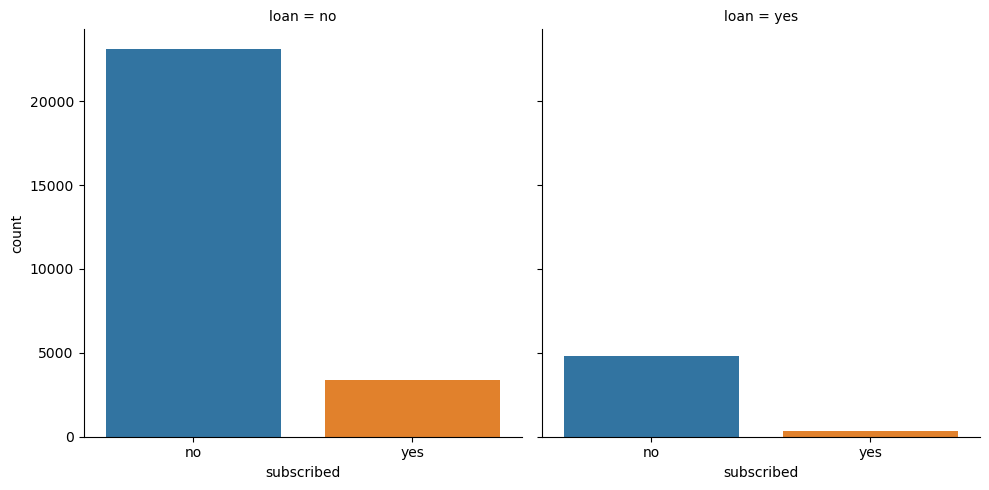

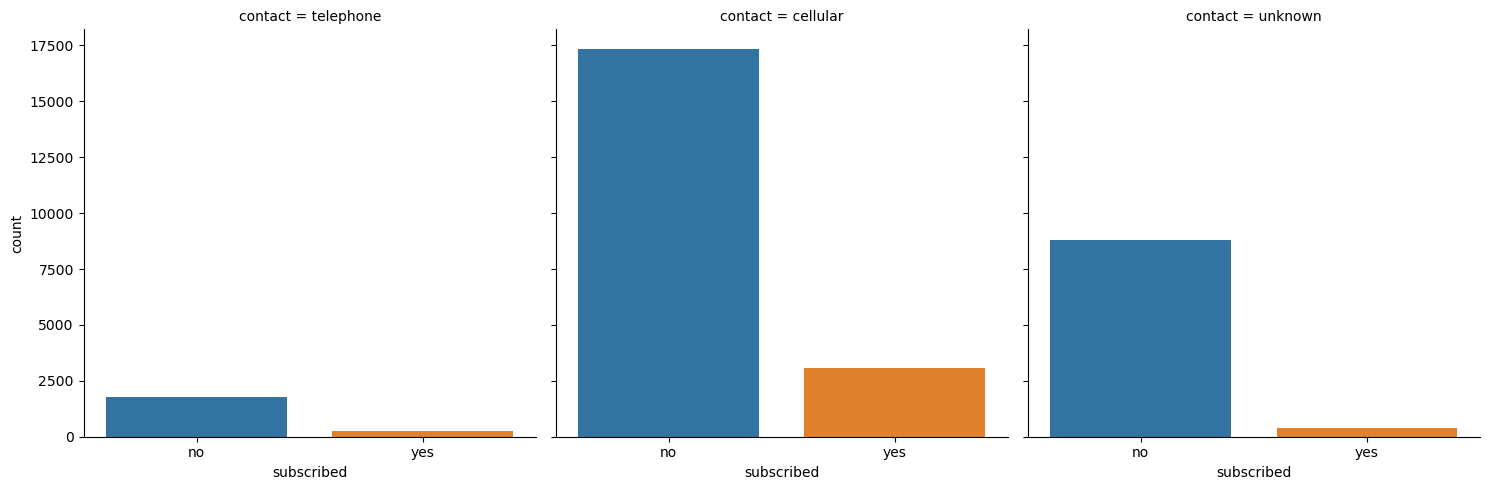

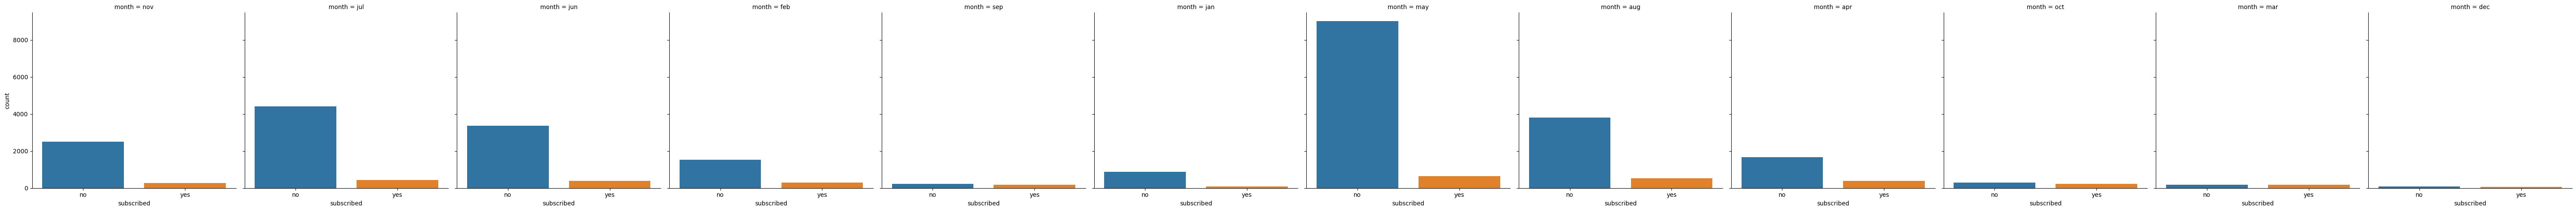

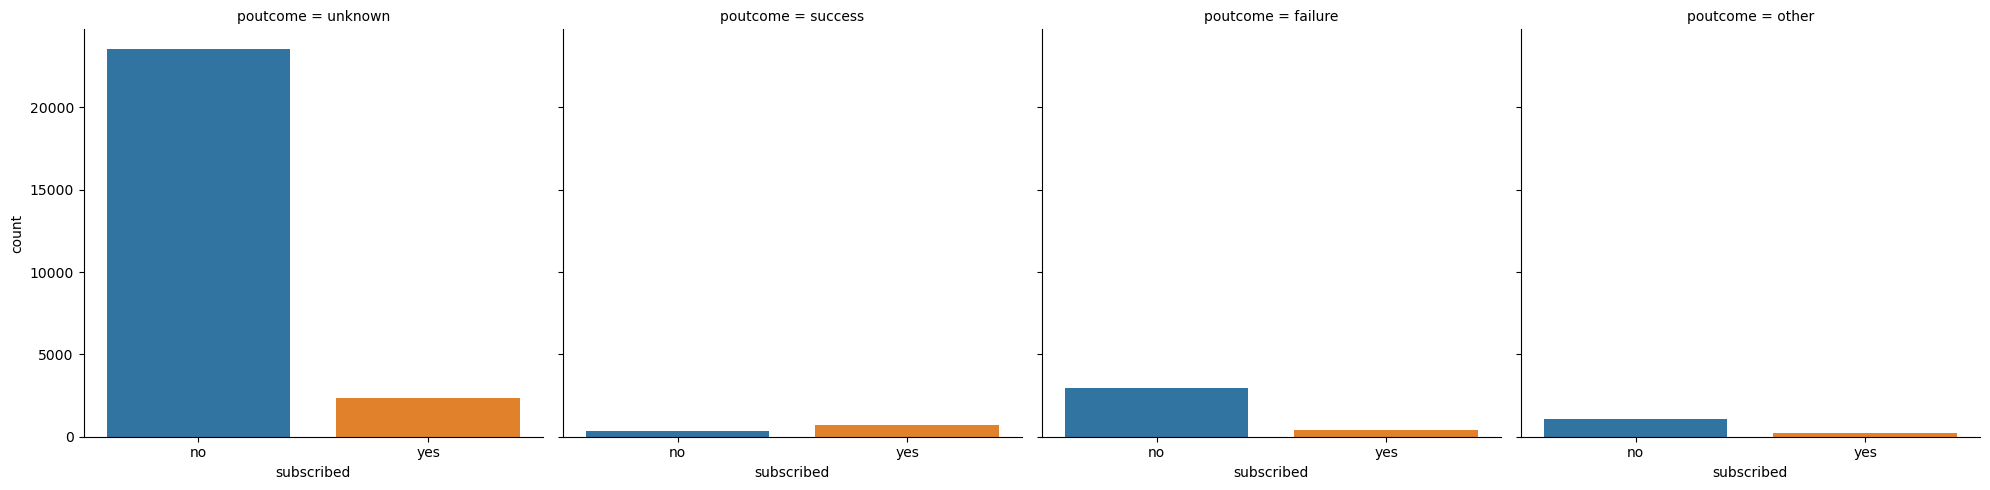

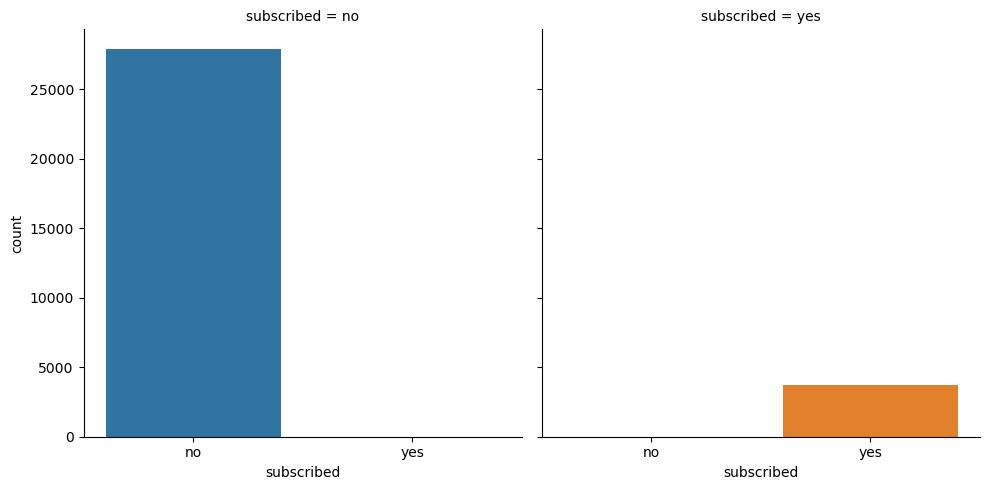

<Figure size 2000x10000 with 0 Axes>

In [19]:
for categorical_feature in categorical_features:
    sns.catplot(x='subscribed', col=categorical_feature,kind='count',data=train)
plt.figure(figsize=(20,100))
plt.show()

now lets see the numerical features

In [20]:
numerical_features = [feature for feature in train.columns if ((train[feature].dtypes != 'O') & (feature not in ['subscribe']))]
print('Number of numerical variables: ', len(numerical_features))
train[numerical_features]

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,56,1933,19,44,2,-1,0
1,31,3,20,91,2,-1,0
2,27,891,18,240,1,-1,0
3,57,3287,22,867,1,84,3
4,31,119,4,380,1,-1,0
...,...,...,...,...,...,...,...
31642,29,0,12,116,2,-1,0
31643,53,380,5,438,2,-1,0
31644,32,312,7,37,3,-1,0
31645,57,225,15,22,7,337,12


C:\Users\HP\AppData\Local\Temp\ipykernel_11664\1342251261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.age)


<Axes: xlabel='age', ylabel='Density'>

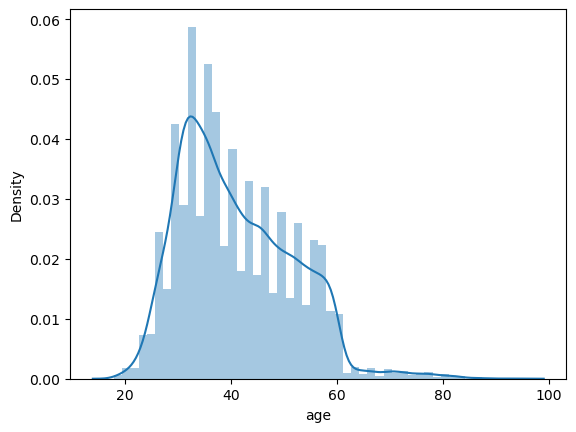

In [21]:
sns.distplot(train.age)

C:\Users\HP\AppData\Local\Temp\ipykernel_11664\3785318982.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.balance)


<Axes: xlabel='balance', ylabel='Density'>

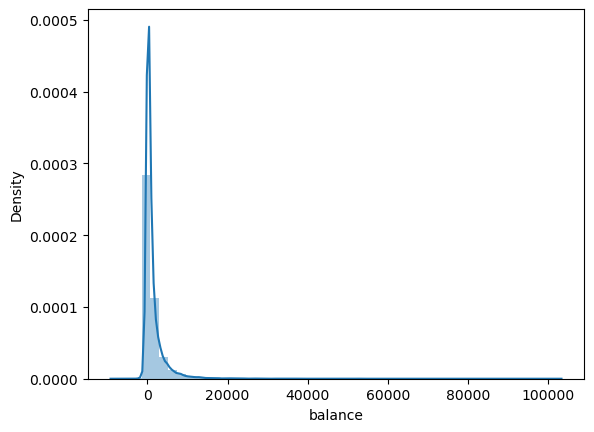

In [22]:
sns.distplot(train.balance)

C:\Users\HP\AppData\Local\Temp\ipykernel_11664\4224400057.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.day)


<Axes: xlabel='day', ylabel='Density'>

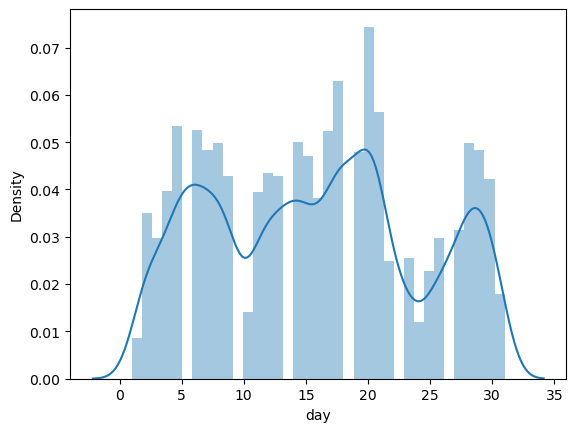

In [23]:
sns.distplot(train.day)

C:\Users\HP\AppData\Local\Temp\ipykernel_11664\3588807623.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.duration)


<Axes: xlabel='duration', ylabel='Density'>

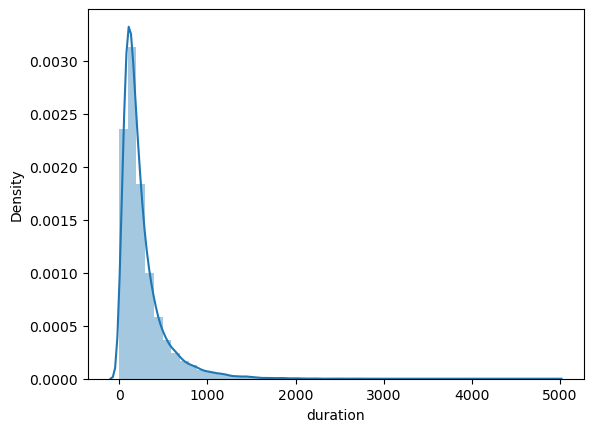

In [24]:
sns.distplot(train.duration)

C:\Users\HP\AppData\Local\Temp\ipykernel_11664\1250758178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.campaign)


<Axes: xlabel='campaign', ylabel='Density'>

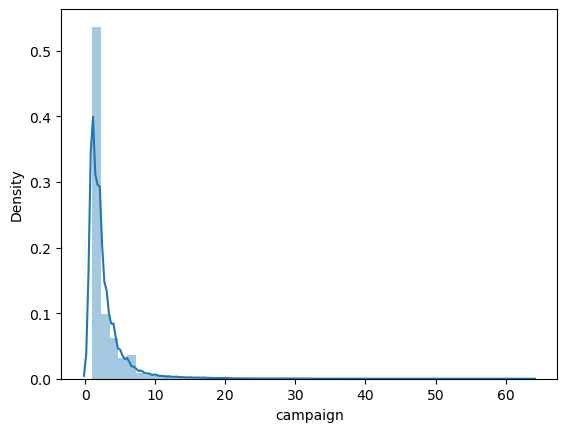

In [25]:
sns.distplot(train.campaign)

C:\Users\HP\AppData\Local\Temp\ipykernel_11664\2056038705.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.pdays)


<Axes: xlabel='pdays', ylabel='Density'>

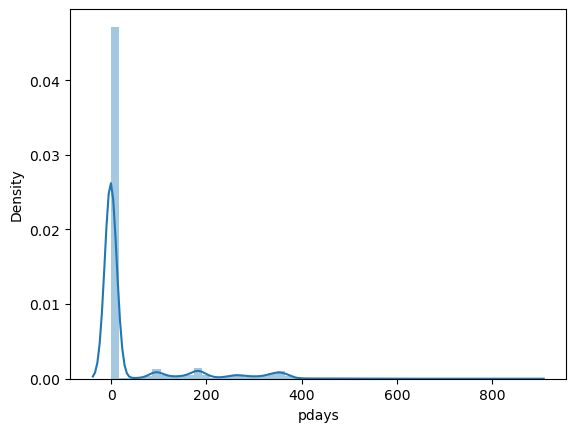

In [26]:
sns.distplot(train.pdays)

C:\Users\HP\AppData\Local\Temp\ipykernel_11664\1105159913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.previous)


<Axes: xlabel='previous', ylabel='Density'>

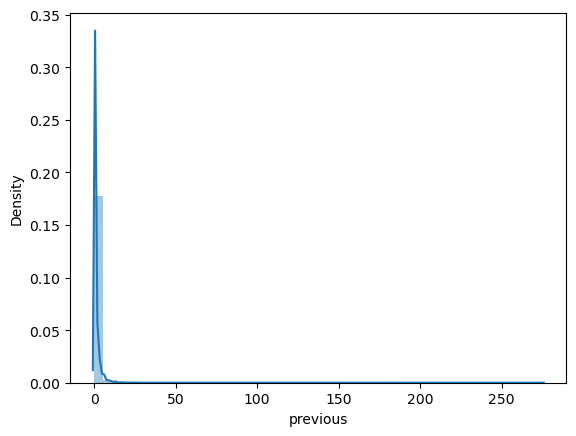

In [27]:
sns.distplot(train.previous)

now lets see if there are some outliers in the datasets

<Axes: >

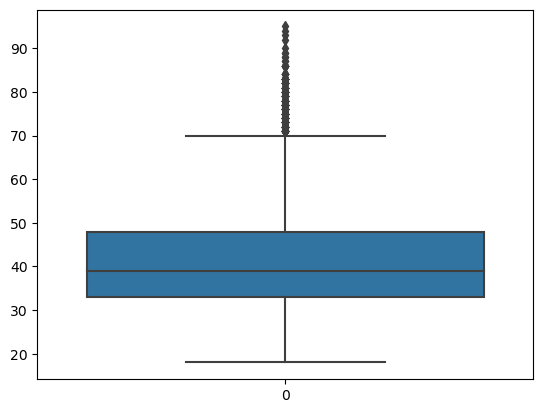

In [28]:
sns.boxplot(train['age'])

<Axes: >

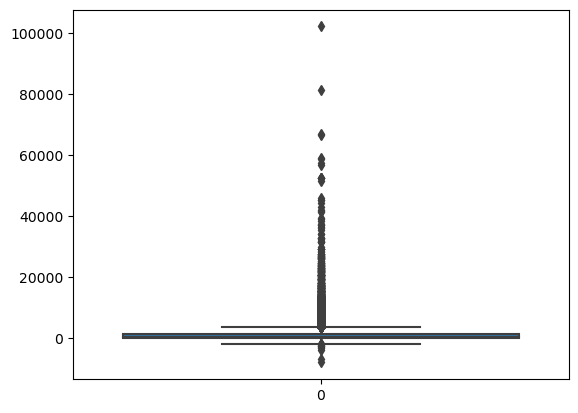

In [29]:
sns.boxplot(train['balance'])

<Axes: >

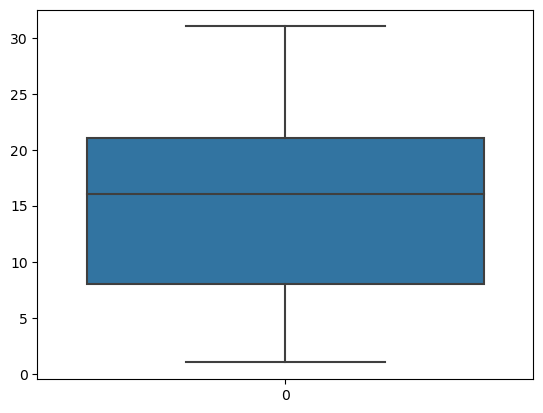

In [30]:
sns.boxplot(train['day'])

<Axes: >

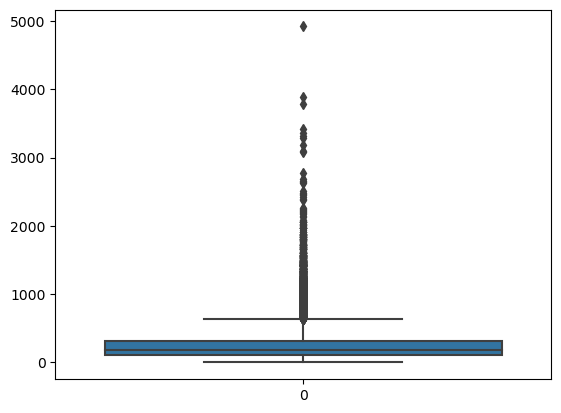

In [31]:
sns.boxplot(train['duration'])

<Axes: >

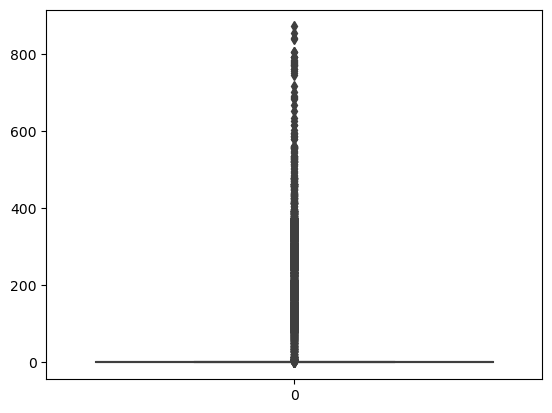

In [32]:
sns.boxplot(train['pdays'])

<Axes: >

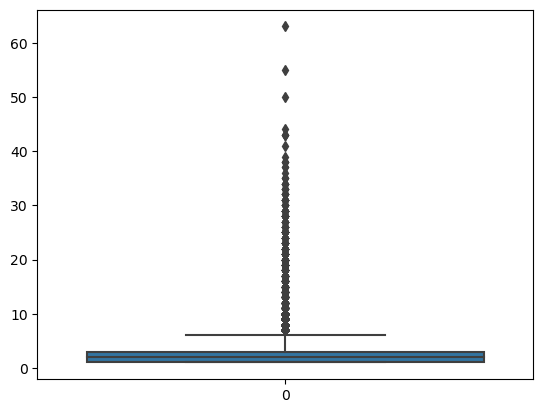

In [33]:
sns.boxplot(train['campaign'])

<Axes: >

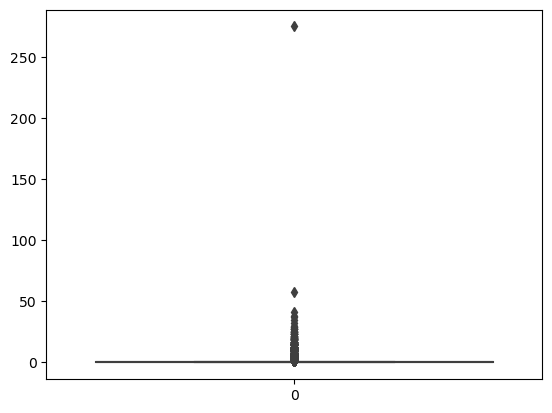

In [34]:
sns.boxplot(train['previous'])

as we see from the above boxplots age, balance, duration, compaign, pdays and previous has some outliers

<Axes: >

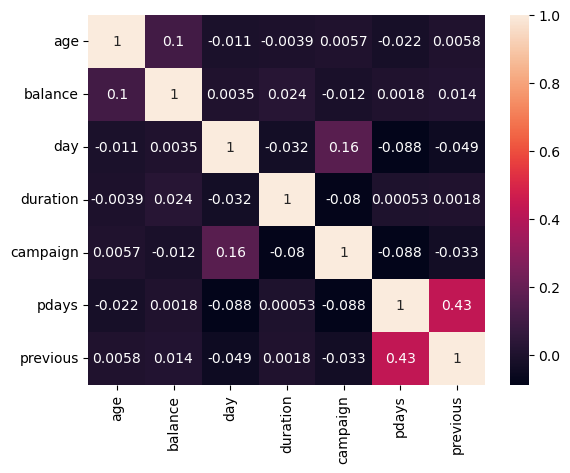

In [35]:
sns.heatmap(train[numerical_features].corr(),annot=True)

as we see the heatmap no feature is heavily correlated

lets see the counts of subscribed people

<Axes: xlabel='subscribed', ylabel='count'>

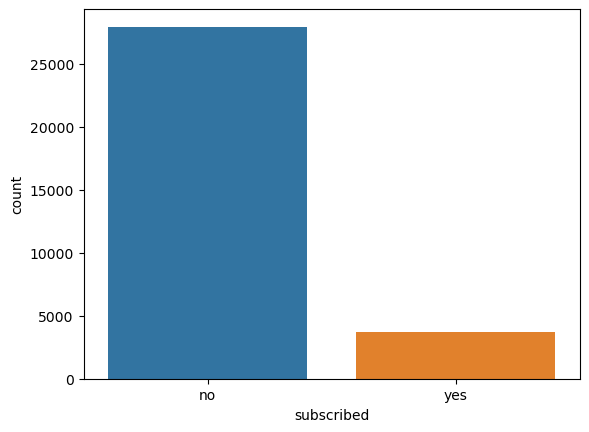

In [36]:
sns.countplot(x='subscribed',data=train)


In [37]:
train['subscribed'].groupby(train['subscribed']).count()

subscribed
no     27932
yes     3715
Name: subscribed, dtype: int64

In [38]:
train_new=train.copy()
test_new=test.copy()
train_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [39]:
test_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [40]:
train_new.groupby(['subscribed','default']).size()

subscribed  default
no          no         27388
            yes          544
yes         no          3674
            yes           41
dtype: int64

since default coloumn doesnot play important role we will drop the default coulmns from both the data sets

In [41]:
train_new.drop(['default'],axis=1,inplace=True)

In [42]:
test_new.drop(['default'],axis=1,inplace=True)

In [43]:
train_new.groupby(['subscribed','pdays']).size()

subscribed  pdays
no          -1       23553
             1           6
             2          24
             4           1
             5           7
                     ...  
yes          792         1
             804         1
             805         1
             842         1
             854         1
Length: 804, dtype: int64

since it has -1 values we will drop pdays also

In [44]:
train_new.drop(['pdays'],axis=1,inplace=True)

In [45]:
test_new.drop(['pdays'],axis=1,inplace=True)

In [46]:
train_new.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,admin.,married,unknown,1933,no,no,telephone,19,nov,44,2,0,unknown,no
1,31,unknown,married,secondary,3,no,no,cellular,20,jul,91,2,0,unknown,no
2,27,services,married,secondary,891,yes,no,cellular,18,jul,240,1,0,unknown,no
3,57,management,divorced,tertiary,3287,no,no,cellular,22,jun,867,1,3,success,yes
4,31,technician,married,secondary,119,yes,no,cellular,4,feb,380,1,0,unknown,no


In [47]:
test_new.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,services,married,secondary,118,yes,no,cellular,15,may,20,6,0,unknown
1,78,retired,divorced,primary,2787,no,no,telephone,1,jul,372,1,0,unknown
2,31,self-employed,single,tertiary,144,yes,no,unknown,16,may,676,1,0,unknown
3,57,services,single,primary,3777,yes,no,telephone,13,may,65,2,0,unknown
4,45,blue-collar,divorced,secondary,-705,no,yes,unknown,3,jul,111,1,0,unknown


In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
list1=['job','marital','education','housing','loan','contact','month','poutcome','subscribed']
for val in list1:
    train_new[val]=le.fit_transform(train_new[val].astype(str))
train_new

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,0,1,3,1933,0,0,1,19,9,44,2,0,3,0
1,31,11,1,1,3,0,0,0,20,5,91,2,0,3,0
2,27,7,1,1,891,1,0,0,18,5,240,1,0,3,0
3,57,4,0,2,3287,0,0,0,22,6,867,1,3,2,1
4,31,9,1,1,119,1,0,0,4,3,380,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,1,0,0,12,8,116,2,0,3,0
31643,53,4,0,2,380,0,1,0,5,6,438,2,0,3,1
31644,32,4,2,2,312,0,0,0,7,1,37,3,0,3,0
31645,57,9,1,1,225,1,0,1,15,8,22,7,12,0,0


as we see we converted the categorical data into the numerical one 

In [50]:
list1=['job','marital','education','housing','loan','contact','month','poutcome']
for val in list1:
    test_new[val]=le.fit_transform(test_new[val].astype(str))
test_new

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,7,1,1,118,1,0,0,15,8,20,6,0,3
1,78,5,0,0,2787,0,0,1,1,5,372,1,0,3
2,31,6,2,2,144,1,0,2,16,8,676,1,0,3
3,57,7,2,0,3777,1,0,1,13,8,65,2,0,3
4,45,1,0,1,-705,0,1,2,3,5,111,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,45,0,0,0,28,1,148,4,0,3
13560,54,1,1,0,2281,1,0,2,20,6,158,1,0,3
13561,35,5,1,0,285,1,0,0,29,4,136,1,0,3
13562,29,0,2,1,464,0,0,0,9,9,208,2,3,2


now we will remove the outliers

<Axes: >

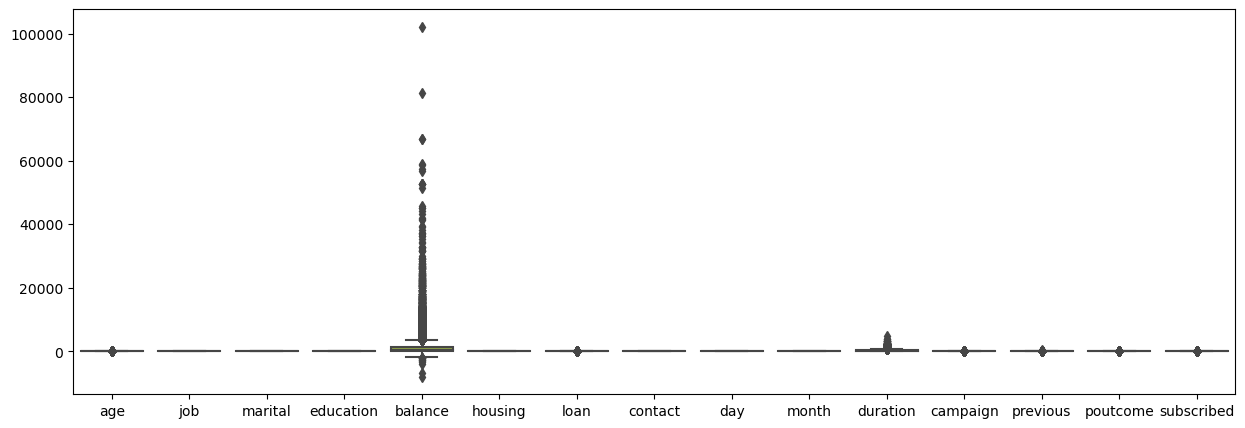

In [51]:
fig=plt.figure(figsize=(15,5))
sns.boxplot(data=train_new)

as we see balance has many outliers

<Axes: >

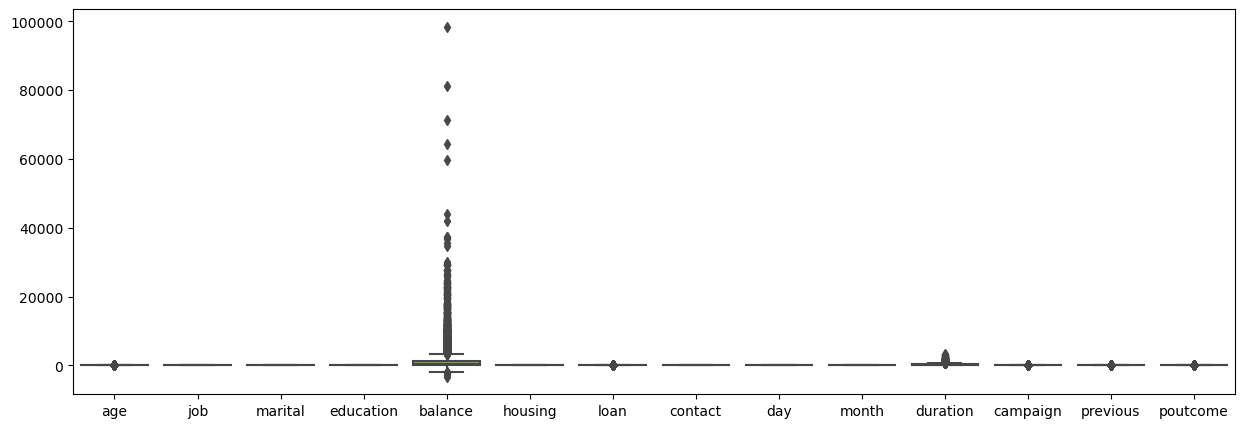

In [52]:
fig=plt.figure(figsize=(15,5))
sns.boxplot(data=test_new)

In [53]:
train_new.groupby(['subscribed','balance'],sort=True)['balance'].count()

subscribed  balance
0           -8019      1
            -6847      1
            -4057      1
            -3372      1
            -2712      1
                      ..
1            32685     1
             36252     1
             45248     1
             52587     2
             81204     1
Name: balance, Length: 7969, dtype: int64

since we cannot the remove the  outliers in the balance column as balance goes high, client show interest on subscribe

In [54]:
train_new.groupby(['subscribed','campaign'],sort=True)['campaign'].count()

subscribed  campaign
0           1           10486
            2            7792
            3            3439
            4            2213
            5            1147
                        ...  
1           16              2
            17              6
            20              1
            24              1
            32              1
Name: campaign, Length: 65, dtype: int64

now lets split the data into training and testing

In [55]:
from sklearn.model_selection import train_test_split

In [63]:
x=train_new.drop(columns='subscribed')

In [64]:
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,56,0,1,3,1933,0,0,1,19,9,44,2,0,3
1,31,11,1,1,3,0,0,0,20,5,91,2,0,3
2,27,7,1,1,891,1,0,0,18,5,240,1,0,3
3,57,4,0,2,3287,0,0,0,22,6,867,1,3,2
4,31,9,1,1,119,1,0,0,4,3,380,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,1,0,0,12,8,116,2,0,3
31643,53,4,0,2,380,0,1,0,5,6,438,2,0,3
31644,32,4,2,2,312,0,0,0,7,1,37,3,0,3
31645,57,9,1,1,225,1,0,1,15,8,22,7,12,0


In [65]:
y=train_new['subscribed']

In [66]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int32

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [69]:
x_train.shape

(23735, 14)

In [70]:
y_train.shape

(23735,)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [108]:
#cross validation
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=x_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.91068043 0.89551296 0.90162208 0.90162208 0.89930482]
0.9017484727196123


In [72]:
rfc=RandomForestClassifier()

In [73]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [78]:
predictrfc=rfc.predict(x_test)
predictrfc

array([0, 0, 0, ..., 1, 0, 0])

In [79]:
print(accuracy_score(y_test,predictrfc))

0.900530839231547


In [80]:
print(confusion_matrix(y_test,predictrfc))

[[6769  187]
 [ 600  356]]


In [81]:
print(classification_report(y_test,predictrfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      6956
           1       0.66      0.37      0.47       956

    accuracy                           0.90      7912
   macro avg       0.79      0.67      0.71      7912
weighted avg       0.89      0.90      0.89      7912



hence the accuracy score for the random forest classifiers is 0.900

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn=KNeighborsClassifier()

In [109]:
#cross validation
model_score =cross_val_score(estimator=KNeighborsClassifier(),X=x_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.87718559 0.87465768 0.88013482 0.88034548 0.87550032]
0.877564777754371


In [84]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [85]:
predictknn=knn.predict(x_test)
predictknn

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
print(accuracy_score(y_test,predictknn))

0.875252780586451


In [87]:
print(confusion_matrix(y_test,predictknn))

[[6734  222]
 [ 765  191]]


In [88]:
print(classification_report(y_test,predictknn))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6956
           1       0.46      0.20      0.28       956

    accuracy                           0.88      7912
   macro avg       0.68      0.58      0.61      7912
weighted avg       0.85      0.88      0.85      7912



hence the accuracy score for kNeighborsClassifier is 87%

In [89]:
from sklearn.svm import SVC

In [90]:
svm=SVC()

In [110]:
#cross validation
model_score =cross_val_score(estimator=SVC(),X=x_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.88350537 0.88350537 0.88392669 0.88371603 0.88392669]
0.8837160311775858


In [91]:
svm.fit(x_train,y_train)

SVC()

In [92]:
predictsvm=svm.predict(x_test)
predictsvm

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
print(accuracy_score(y_test,predictsvm))

0.8792972699696663


In [95]:
print(confusion_matrix(y_test,predictsvm))

[[6955    1]
 [ 954    2]]


In [97]:
print(classification_report(y_test,predictsvm))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6956
           1       0.67      0.00      0.00       956

    accuracy                           0.88      7912
   macro avg       0.77      0.50      0.47      7912
weighted avg       0.85      0.88      0.82      7912



In [101]:
data=[{'Model Name':'Random Forest Classifier','Accuracy':'90.05 %'},{'Model Name':'KNeighbors Classifier','Accuracy':'87.52 %'},{'Model Name':'Support Vector Machine','Accuracy':'87.92 %'}]

In [102]:
Accuracy=pd.DataFrame(data)
Accuracy

,Model Name,Accuracy
0,Random Forest Classifier,90.05 %
1,KNeighbors Classifier,87.52 %
2,Support Vector Machine,87.92 %


Hence Out of theses Random Forest classifier has the accuracy

In [103]:
def predict_subscribe(t):
    t=t.reshape(1,-1)
    pred=rfc.predict(t)
    if pred==0:
        print("The Costomer has not  Subscribed term deposit")
    else:
        print('The Costomer has subscribed term deposit')


In [106]:
t=np.array([32,7,1,1,118,1,0,0,15,8,20,6,0,3])
predict_subscribe(t)

The Costomer has not  Subscribed term deposit
